# Шифр Квадрат Полибия
Импорты и алфавит

In [1]:
from colorama import Fore as text_color

alphabet = {'а':'11', 'б':'12', 'в':'13', 'г':'14',
            'д':'15', 'е':'16', 'ж':'21', 'з':'22',
            'и':'23', 'й':'24', 'к':'25', 'л':'26',
            'м':'31', 'н':'32', 'о':'33', 'п':'34',
            'р':'35', 'с':'36', 'т':'41', 'у':'42',
            'ф':'43', 'х':'44', 'ц':'45', 'ч':'46',
            'ш':'51', 'щ':'52', 'ъ':'53', 'ы':'54',
            'ь':'55', 'э':'56', 'ю':'61', 'я':'62'}

Функция шифрования

In [2]:
def polyby_square(string: str, alphabet: dict = alphabet) -> str:
    string = list(string.lower())

    new_str = ''
    for char in string:
        new_str += alphabet.get(char, char + char) + ' '
    return new_str[:-1]

Функция расшифрования

In [3]:
def polyby_square_decrypt(string: str, alphabet: dict = alphabet) -> str:
    if not string.strip():
        return ''
    
    # Разбиваем строку на пары координат
    coords = string.split()
    
    # Создаем словарь для обратного отображения
    reverse_alphabet = {}
    for char, coord in alphabet.items():
        reverse_alphabet[coord] = char
    
    # Расшифровываем каждую пару координат
    decrypted_chars = []
    i = 0
    while i < len(coords):
        coord = coords[i].strip()
        if coord in reverse_alphabet:
            decrypted_chars.append(reverse_alphabet[coord])
        elif i + 1 < len(coords) and coords[i] == coords[i+1]:
            # Обработка дублирующихся символов
            char = coords[i][0]
            decrypted_chars.append(char)
            i += 1
        i += 1
    
    return ''.join(decrypted_chars).upper()

Проверка

In [4]:
try:
    open_text = 'НЕВСЕТЕПОВАРАЗПТЧТОСДЛИННЫМИНОЖАМИХОДЯТТЧК'
    encrypted_text = polyby_square(open_text)
    decrypted_text = polyby_square_decrypt(encrypted_text)

    assert encrypted_text == '32 16 13 36 16 41 16 34 33 13 11 35 11 22 34 41 46 41 33 36 15 26 23 32 32 54 31 23 32 33 21 11 31 23 44 33 15 62 41 41 46 25', 'Зашифрованный текст не совпадает с образцом'
    assert open_text == decrypted_text, 'Расшифрованный текст не совпадает с изначальным'
    print(f'{text_color.LIGHTGREEN_EX}Шифрование корректно{text_color.RESET}')
except AssertionError as e:
    print(f'{text_color.LIGHTRED_EX}Шифрование не корректно: {e}{text_color.RESET}')

Шифрование корректно


Сравнение гистограмм до шифрования и после

Открытый текст


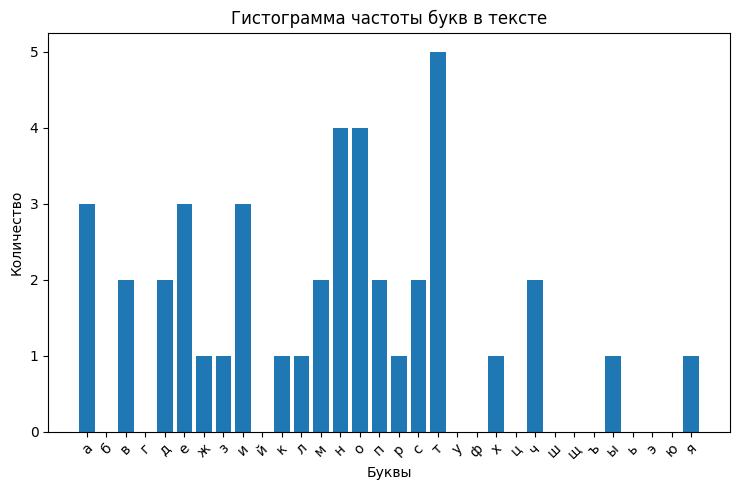

Зашифрованный текст


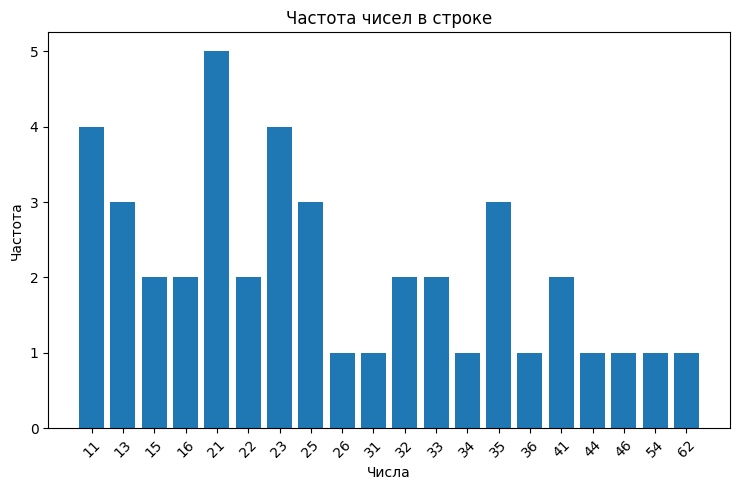

In [5]:
from utils.gist import plot_letter_count, plot_number_count

print('Открытый текст')
plot_letter_count(open_text)
print('Зашифрованный текст')
plot_number_count(encrypted_text)

Ввод строки для шифрования

In [8]:
open_text = input('Введите открытый текст для шифрования: ')
encrypted_text = polyby_square(open_text)
print(encrypted_text)

11 12 13 14 15


Ввод строки для расшифрования

In [9]:
encrypted_text = input('Введите текст для расшифрования: ')
decrypted_text = polyby_square_decrypt(encrypted_text)
print(decrypted_text)

АБВГД
